In [1]:
import pandas as pd
import zipfile, StringIO
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
z1 = zipfile.ZipFile('aisles.csv.zip')
aisles = pd.read_csv(z1.open('aisles.csv'))

z2 = zipfile.ZipFile('departments.csv.zip')
departments = pd.read_csv(z2.open('departments.csv'))

z3 = zipfile.ZipFile('orders.csv.zip')
orders = pd.read_csv(z3.open('orders.csv'))

z4 = zipfile.ZipFile('products.csv.zip')
products = pd.read_csv(z4.open('products.csv'))

z5 = zipfile.ZipFile('order_products__prior.csv.zip')
order_products__prior = pd.read_csv(z5.open('order_products__prior.csv'))

z6 = zipfile.ZipFile('order_products__train.csv.zip')
order_products__train = pd.read_csv(z6.open('order_products__train.csv'))

### Number of orders per user

All users have at least 4 orders. Mean number of orders is 16.6, median is 10. Maximum number of orders is 100, probably a cutoff in the dataset.

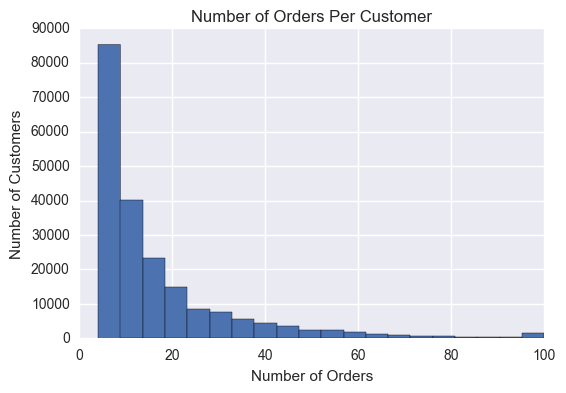

In [347]:
num_orders = pd.DataFrame(orders.groupby('user_id')['order_number'].max())
num_orders.hist(bins=20)
num_orders.describe().T
plt.title('Number of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.savefig('figures/orders.png', bbox_inches='tight')

### Popularity of Days and Times to Order

In [83]:
orders.describe()

/Users/clairemiller/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,NaN
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,NaN
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,NaN
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


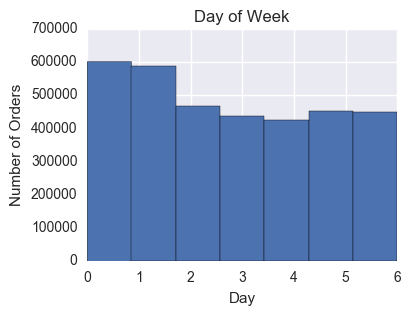

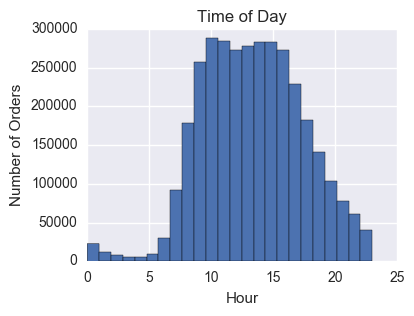

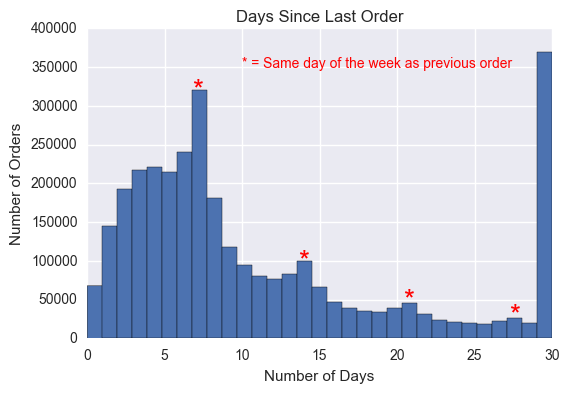

In [348]:
plt.figure(figsize=(4,3))
orders['order_dow'].hist(bins=7)
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Day of Week')
plt.savefig('figures/day.png', bbox_inches='tight')

plt.figure(figsize=(4,3))
orders['order_hour_of_day'].hist(bins=24)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Time of Day')
plt.savefig('figures/time.png', bbox_inches='tight')

plt.figure()
orders['days_since_prior_order'].hist(bins=31)
plt.title('Days Since Last Order')
plt.xlabel('Number of Days')
plt.ylabel('Number of Orders')
plt.text(6.8,310000,'*',color='red',size=20)
plt.text(13.6,90000,'*',color='red',size=20)
plt.text(20.4,40000,'*',color='red',size=20)
plt.text(27.2,20000,'*',color='red',size=20)
plt.text(10,350000,'* = Same day of the week as previous order', color='red')
plt.savefig('figures/freq.png', bbox_inches='tight')

### Items reordered

In [111]:
names = ['Not Reordered', 'Reordered']
i = 0
for val in order_products__prior.groupby('reordered').size():
    print names[i], '\t', float(val)/len(order_products__prior)
    i += 1

Not Reordered 	0.410302533208
Reordered 	0.589697466792


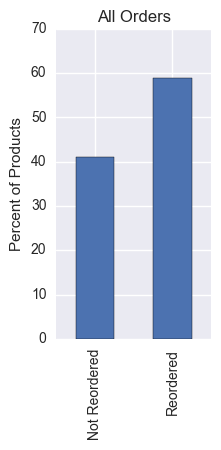

In [31]:
reordered = pd.DataFrame(order_products__prior.groupby('reordered').size()).rename(columns={0: 'count'})
reordered['count'] = reordered['count']/reordered['count'].sum()*100
fig, ax = plt.subplots(figsize=(2,4))
reordered['count'].plot(kind='bar', ax=ax)
ax.set_xticklabels(['Not Reordered','Reordered'])
plt.xlabel('')
plt.ylabel('Percent of Products')
plt.title('All Orders')
plt.ylim([0,70])
plt.savefig('figures/pct_reordered.png',bbox_inches='tight')

In [371]:
not_1_order_ids = orders[orders['order_number']>1]['order_id'].values

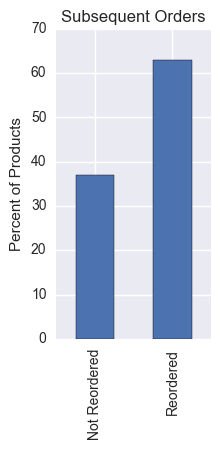

In [379]:
#reordered_not1 = pd.DataFrame(order_products__prior[order_products__prior['order_id'].isin(not_1_order_ids)].groupby('reordered').size()).rename(columns={0: 'count'})
#reordered_not1['count'] = reordered_not1['count']/reordered_not1['count'].sum()*100
fig, ax = plt.subplots(figsize=(2,4))
reordered_not1['count'].plot(kind='bar', ax=ax)
ax.set_xticklabels(['Not Reordered','Reordered'])
plt.xlabel('')
plt.ylabel('Percent of Products')
plt.title('Subsequent Orders')
plt.savefig('figures/pct_reordered_not1.png',bbox_inches='tight')

In [14]:
results = []
for i in xrange(2,16):
    print i
    num_order_ids = orders[orders['order_number'] == i]['order_id'].values
    reordered_num = order_products__prior[order_products__prior['order_id'].isin(num_order_ids)]['reordered']
    results.append([i,reordered_num.sum()/float(len(reordered_num))])

11
12
13
14
15


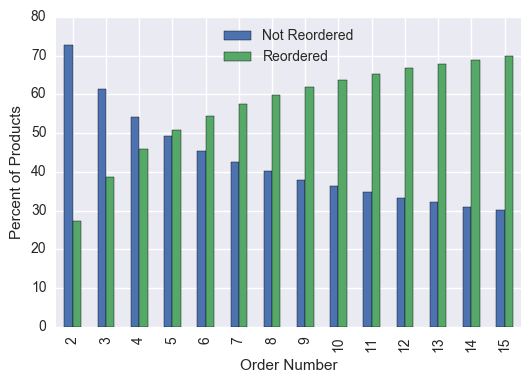

In [29]:
reorder_by_num = pd.DataFrame(results, columns=['order_number','reorder_pct'])
reorder_by_num['non_reorder_pct'] = 100*(1 - reorder_by_num['reorder_pct'])
reorder_by_num['reorder_pct'] = reorder_by_num['reorder_pct']*100
reorder_by_num.set_index('order_number')[['non_reorder_pct','reorder_pct']].plot.bar()
plt.legend(['Not Reordered', 'Reordered'],loc=9)
plt.xlabel('Order Number')
plt.ylabel('Percent of Products')
plt.savefig('figures/reorder_by_num.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(5,2,figsize=(10,8))
x = 0
y = 0
for i in xrange(2,11):
    print i
    num_order_ids = orders[orders['order_number'] == i]['order_id'].values
    reordered_num = pd.DataFrame(order_products__prior[order_products__prior['order_id'].isin(num_order_ids)].groupby('reordered').size()).rename(columns={0: 'count'})
    reordered_num['count'] = reordered_num['count']/reordered_num['count'].sum()*100
    
    reordered_num['count'].plot(kind='bar', ax=ax[x,y])
    ax.set_xticklabels(['Not Reordered','Reordered'])
    plt.xlabel('')
    plt.ylabel('Percent of Products')
    plt.title('Order %d'%i)
    x += 1
    if x == 5:
        x = 0
        y = 1
#plt.savefig('figures/pct_reordered_not1.png',bbox_inches='tight')

2


In [115]:
order_products__prior.columns, orders.columns

(Index([u'order_id', u'product_id', u'add_to_cart_order', u'reordered'], dtype='object'),
 Index([u'order_id', u'user_id', u'eval_set', u'order_number', u'order_dow',
        u'order_hour_of_day', u'days_since_prior_order'],
       dtype='object'))

In [116]:
order_products__prior.merge(orders, on='order_id').head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


### Popularity of Items Ordered and Reordered

Without bayesian smoothing, the items with the highest reorder fraction are ones that aren't order very frequently. With smoothing, a few of the popular items appear in the top 20 fractions and all are items ordered somewhat frequently. I used a relatively small smoothing parameter of 100 considering the most ordered item (Bananas) was ordered over 400,000 times.

In [34]:
item_counts = pd.DataFrame(order_products__prior.groupby('product_id').size(), columns=['count'])
item_counts = item_counts.sort_values('count', ascending=False).reset_index()
top_20_items = item_counts.loc[:19].merge(products, on='product_id')['product_name'].values

In [35]:
top_20_items

array(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk',
       'Organic Raspberries', 'Organic Yellow Onion', 'Organic Garlic',
       'Organic Zucchini', 'Organic Blueberries', 'Cucumber Kirby',
       'Organic Fuji Apple', 'Organic Lemon', 'Apple Honeycrisp Organic',
       'Organic Grape Tomatoes'], dtype=object)

In [125]:
reorder_counts = pd.DataFrame(order_products__prior[order_products__prior['reordered'] == 1].groupby('product_id').size(), columns=['count'])
reorder_counts = reorder_counts.sort_values('count', ascending=False).reset_index()
top_20_reorder = reorder_counts.loc[:19].merge(products, on='product_id')['product_name'].values

In [151]:
top_20_reorder

array(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Organic Whole Milk', 'Large Lemon', 'Organic Raspberries',
       'Strawberries', 'Limes', 'Organic Yellow Onion', 'Organic Garlic',
       'Organic Zucchini', 'Cucumber Kirby', 'Organic Fuji Apple',
       'Organic Blueberries', 'Apple Honeycrisp Organic', 'Organic Lemon',
       'Organic Half & Half', 'Sparkling Water Grapefruit'], dtype=object)

In [36]:
reorder_fraction = pd.DataFrame(order_products__prior.groupby('product_id')['reordered'].mean()).rename(columns={'reordered': 'fraction'})
reorder_fraction = reorder_fraction.sort_values('fraction',ascending=False).reset_index()
top_20_fractions = reorder_fraction.loc[:19].merge(products, on='product_id')['product_name'].values

In [37]:
top_20_fractions

array(['Raw Veggie Wrappers', 'Serenity Ultimate Extrema Overnight Pads',
       'Orange Energy Shots', 'Chocolate Love Bar',
       'Soy Powder Infant Formula', 'Simply Sleep Nighttime Sleep Aid',
       'Energy Shot, Grape Flavor',
       'Russian River Valley Reserve Pinot Noir', 'Sparking Water',
       'Maca Buttercups', 'Bars Peanut Butter',
       'Soy Crisps Lightly Salted',
       'Jet Fuel Dark Roast Whole Bean Coffee', 'High Gravity Lager',
       'Benchbreak Chardonnay', 'Buttery Spray', 'Almond Orgeat Syrup',
       'Organic Blueberry B Mega', 'Beer Can', 'Amazake Almond Shake'], dtype=object)

In [38]:
reorder_fraction_smooth = pd.DataFrame(order_products__prior.groupby('product_id')['reordered'].apply(lambda x: float(x.sum())/(len(x)+100))).rename(columns={'reordered': 'fraction'})
reorder_fraction_smooth = reorder_fraction_smooth.sort_values('fraction',ascending=False).reset_index()
top_20_fractions_smooth = reorder_fraction_smooth.loc[:19].merge(products, on='product_id')['product_name'].values

In [39]:
top_20_fractions_smooth

array(['Whole Organic Omega 3 Milk', 'Milk, Organic, Vitamin D',
       'Organic Lactose Free Whole Milk', 'Organic Reduced Fat Milk',
       'Banana', 'Organic Homogenized Whole Milk',
       'Organic Lowfat 1% Milk', 'Goat Milk',
       'Half And Half Ultra Pasteurized', 'Organic  Whole Milk',
       'Bag of Organic Bananas', 'Organic Milk Reduced Fat, 2% Milkfat',
       'Organic Whole Milk', 'Organic Fat Free Milk',
       'Organic Low Fat Milk', 'Organic Reduced Fat Omega-3 Milk',
       '0% Greek Strained Yogurt', 'Organic Whole Milk with DHA Omega-3',
       'Italian Sparkling Mineral Water', 'Spring Water'], dtype=object)

In [182]:
reorder_fraction_smooth.merge(item_counts, on='product_id').head(10)

,product_id,fraction,count
0,45504,0.850891,9108
1,29447,0.850133,20198
2,43394,0.849015,8477
3,38689,0.848307,35663
4,24852,0.843322,472565
5,5514,0.836609,3970
6,39180,0.834257,14869
7,34197,0.833869,5185
8,9292,0.833168,2921
9,31720,0.832730,9842


In [183]:
reorder_fraction.merge(item_counts, on='product_id').head(10)

,product_id,fraction,count
0,6433,0.941176,68
1,2075,0.931034,87
2,43553,0.923077,13
3,27740,0.920792,101
4,14609,0.914286,35
5,13875,0.911111,45
6,39992,0.909091,22
7,5868,0.900000,30
8,31418,0.900000,60
9,35604,0.900000,100


In [188]:
item_counts.head()

,product_id,count
0,24852,472565
1,13176,379450
2,21137,264683
3,21903,241921
4,47209,213584


### Reorder Category

How often is a new item from the same category as previous item?

In [198]:
order_products_details = order_products__prior.merge(products, on='product_id').merge(orders, on='order_id')

In [258]:
order_products_train_details = order_products__train.merge(products, on='product_id').merge(orders, on='order_id')

In [199]:
order_products_details.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [203]:
order_products_details[(order_products_details['user_id'] == 1) & (order_products_details['reordered'] == 0)]#.groupby(['order_number','department_id']).size()

order_number  department_id
1             7                1
              16               1
              17               1
              19               2
2             4                1
              7                1
              14               1
              19               3
3             7                1
              13               1
              16               1
              19               2
4             7                1
              16               1
              17               1
              19               2
5             4                4
              7                1
              16               1
              19               2
6             7                1
              16               1
              19               2
7             7                1
              14               1
              16               1
              19               2
8             7                2
              16               2
              1

In [205]:
order_products_details[(order_products_details['user_id'] == 1) & (order_products_details['reordered'] == 0)].sort_values('order_number')

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
22667637,2539329,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1,prior,1,2,8,NaN
22667636,2539329,12427,3,0,Original Beef Jerky,23,19,1,prior,1,2,8,NaN
22667635,2539329,26088,4,0,Aged White Cheddar Popcorn,23,19,1,prior,1,2,8,NaN
22667634,2539329,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,1,prior,1,2,8,NaN
22667633,2539329,196,1,0,Soda,77,7,1,prior,1,2,8,NaN
10549932,2398795,13176,4,0,Bag of Organic Bananas,24,4,1,prior,2,3,7,15.0
10549934,2398795,13032,6,0,Cinnamon Toast Crunch,121,14,1,prior,2,3,7,15.0
10549936,2398795,10258,2,0,Pistachios,117,19,1,prior,2,3,7,15.0
22586601,473747,30450,5,0,Creamy Almond Butter,88,13,1,prior,3,3,12,21.0
22586603,473747,25133,4,0,Organic String Cheese,21,16,1,prior,3,3,12,21.0


In [ ]:
order_products__prior.groupby('eval_set')

### Reorder pct vs # of days since last order

In [324]:
reorder_pct = order_products_details.groupby('order_id')['reordered'].mean()*100
reorder_pct = pd.DataFrame(reorder_pct).join(orders[['order_id','days_since_prior_order']].set_index('order_id'))

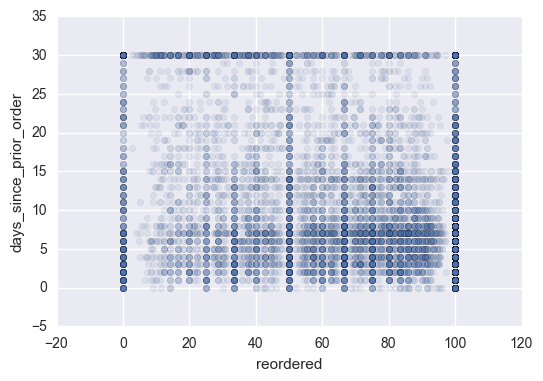

In [334]:
rand_inds = np.random.permutation(reorder_pct.index)[:10000]
reorder_pct.loc[rand_inds].plot(x='reordered',y='days_since_prior_order', kind='scatter', alpha=0.1)

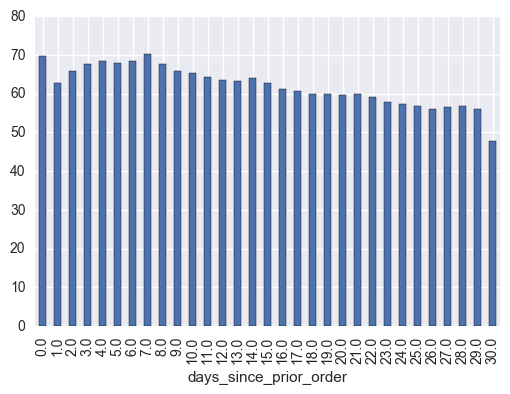

In [338]:
reorder_pct.groupby('days_since_prior_order')['reordered'].mean().plot(kind='bar')

### Models

In [288]:
test_users = orders[orders['eval_set'] == 'test']['user_id'].values
test_users_order_details = order_products_details[order_products_details['user_id'].isin(test_users)]

In [233]:
#get every item a user has ordered
user_items = {}
grouped = order_products_details.groupby('user_id')
for group in grouped:
    user_items[group[0]] = set(group[1]['product_id'].values)

In [240]:
user_order_size = {}
for group in grouped:
    user_order_size[group[0]] = np.mean(group[1].groupby('order_number').size().values)

In [269]:
user_items_test = {}
for user in sorted(orders[orders['eval_set'] == 'test']['user_id'].values):
    user_items_test[user] = ' '.join(map(str,user_items[user]))

In [270]:
test_set = orders[orders['eval_set'] == 'test']

In [273]:
test_set['products'] = test_set['user_id'].map(user_items_test)

/Users/clairemiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [275]:
#all items ever orders
#score = 0.2164845
test_set[['order_id','products']].to_csv('all_items.csv',index=False)

In [300]:
test_users_order_details.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
17,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0
18,120,41273,4,0,Broccoli Florets,123,4,23750,prior,11,6,8,10.0
19,120,40545,1,0,Berry Medley,116,1,23750,prior,11,6,8,10.0
20,120,28204,3,0,Organic Fuji Apple,24,4,23750,prior,11,6,8,10.0
21,120,26604,2,0,Organic Blackberries,24,4,23750,prior,11,6,8,10.0


In [301]:
#all reordered items
user_reordered_items = {}
grouped = test_users_order_details.groupby('user_id')
for group in grouped:
    user_reordered_items[group[0]] = ' '.join(map(str,set(group[1][group[1]['reordered'] == 1].product_id.values)))

In [302]:
#score = 0.2996690
test_set['products'] = test_set['user_id'].map(user_reordered_items)
test_set[['order_id','products']].to_csv('reordered_items.csv',index=False)

/Users/clairemiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [294]:
#most recent order
user_last_items = {}
grouped = test_users_order_details.groupby('user_id')
for group in grouped:
    user_last_items[group[0]] = ' '.join(map(str,group[1][group[1]['order_number'] == group[1]['order_number'].max()].product_id.values))

In [299]:
#repeat most recent order
# score = 0.3118026
test_set['products'] = test_set['user_id'].map(user_last_items)
test_set[['order_id','products']].to_csv('last_items.csv',index=False)

/Users/clairemiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [303]:
#last reordered items
user_last_reordered_items = {}
grouped = test_users_order_details.groupby('user_id')
for group in grouped:
    user_last_reordered_items[group[0]] = ' '.join(map(str,group[1][(group[1]['order_number'] == group[1]['order_number'].max()) & (group[1]['reordered'] == 1)].product_id.values))

In [304]:
#score = 0.3093626
test_set['products'] = test_set['user_id'].map(user_last_reordered_items)
test_set[['order_id','products']].to_csv('last_reordered_items.csv',index=False)

/Users/clairemiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [339]:
test_set.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,items,products
38,2774568,3,test,13,5,15,11.0,17668 39190 44683 21903 14992 21137 32402 2203...,21903 47766 39190 24810 18599 23650
44,329954,4,test,6,3,12,30.0,42329 26576 21573 17769 25623 35469 37646 1200...,
53,1528013,6,test,4,3,16,22.0,40992 27521 20323 48679 8424 45007 25659 10644...,
96,1376945,11,test,8,6,11,8.0,17794 8197 30855 5605 33037 30480 43352 10644 ...,8309 27959 33572
102,1356845,12,test,6,1,20,30.0,11520 45056 17794 40377 44422 17159 44683 3424...,13176 14992 7076 10863 28134
